Input

In [2]:
file_path = "input.txt"  # Path to the input file

with open(file_path, "r") as f:
    data = f.read()

machines = data.split('\n')

m = 101
n = 103

robot_velocity = []
for machine in machines:
    machine = machine.strip()
    robot_velocity.append([
        [int(coord) for coord in machine.split(' ')[0].split('=')[1].split(',')],
        [int(vel) for vel in machine.split(' ')[1].split('=')[1].split(',')]
    ])

Part 1

In [31]:
quad_cnt = [0] * 4

for r_v in robot_velocity:
    pos, vel = r_v
    nx = pos[0] + 100 * vel[0]
    ny = pos[1] + 100 * vel[1]

    remx = nx % m
    remy = ny % n
    if remx < 0:
        remx += m
    if remy < 0:
        remy += n

    # Ignore robots in the center lines
    if remx == m // 2 or remy == n // 2:
        continue

    # Calculate quadrant index
    quad_index = int(remx / (m / 2)) + 2 * int(remy / (n / 2))
    quad_cnt[quad_index] += 1

print("Robots in each quadrant:", quad_cnt)

Robots in each quadrant: [116, 127, 129, 122]


Part 2

In [ ]:
from pprint import pprint

dirs = [[0,1],[0,-1],[1,0],[-1,0]]

seen_grid = set()
for i in range(10000):
    # Create a new grid for each iteration
    grid = [['.'] * n for _ in range(m)]
    
    to_print = False
    for r_v in robot_velocity:
        pos, vel = r_v
        # Update the position based on velocity
        nx = pos[0] + i * vel[0]
        ny = pos[1] + i * vel[1]

        # Wrap around the edges
        remx = nx % m
        remy = ny % n
        if remx < 0: remx += m
        if remy < 0: remy += n

        if (not to_print) and 0 < remx < m-1 and 0 < remy < n-1:
            alldirs = True
            for dir in dirs:
                if grid[remx + dir[0]][remy + dir[1]] != '#':
                    alldirs = False
                    break
            to_print = alldirs
        
        grid[remx][remy] = '#'
    grid_rep = "\n".join(''.join(row) for row in grid)
    if(grid_rep in seen_grid): break # we have cycled back
    seen_grid.add(grid_rep)
    # Print the grid
    if to_print:
        print(f"Iteration {i}")
        print(grid_rep)
        print("\n")

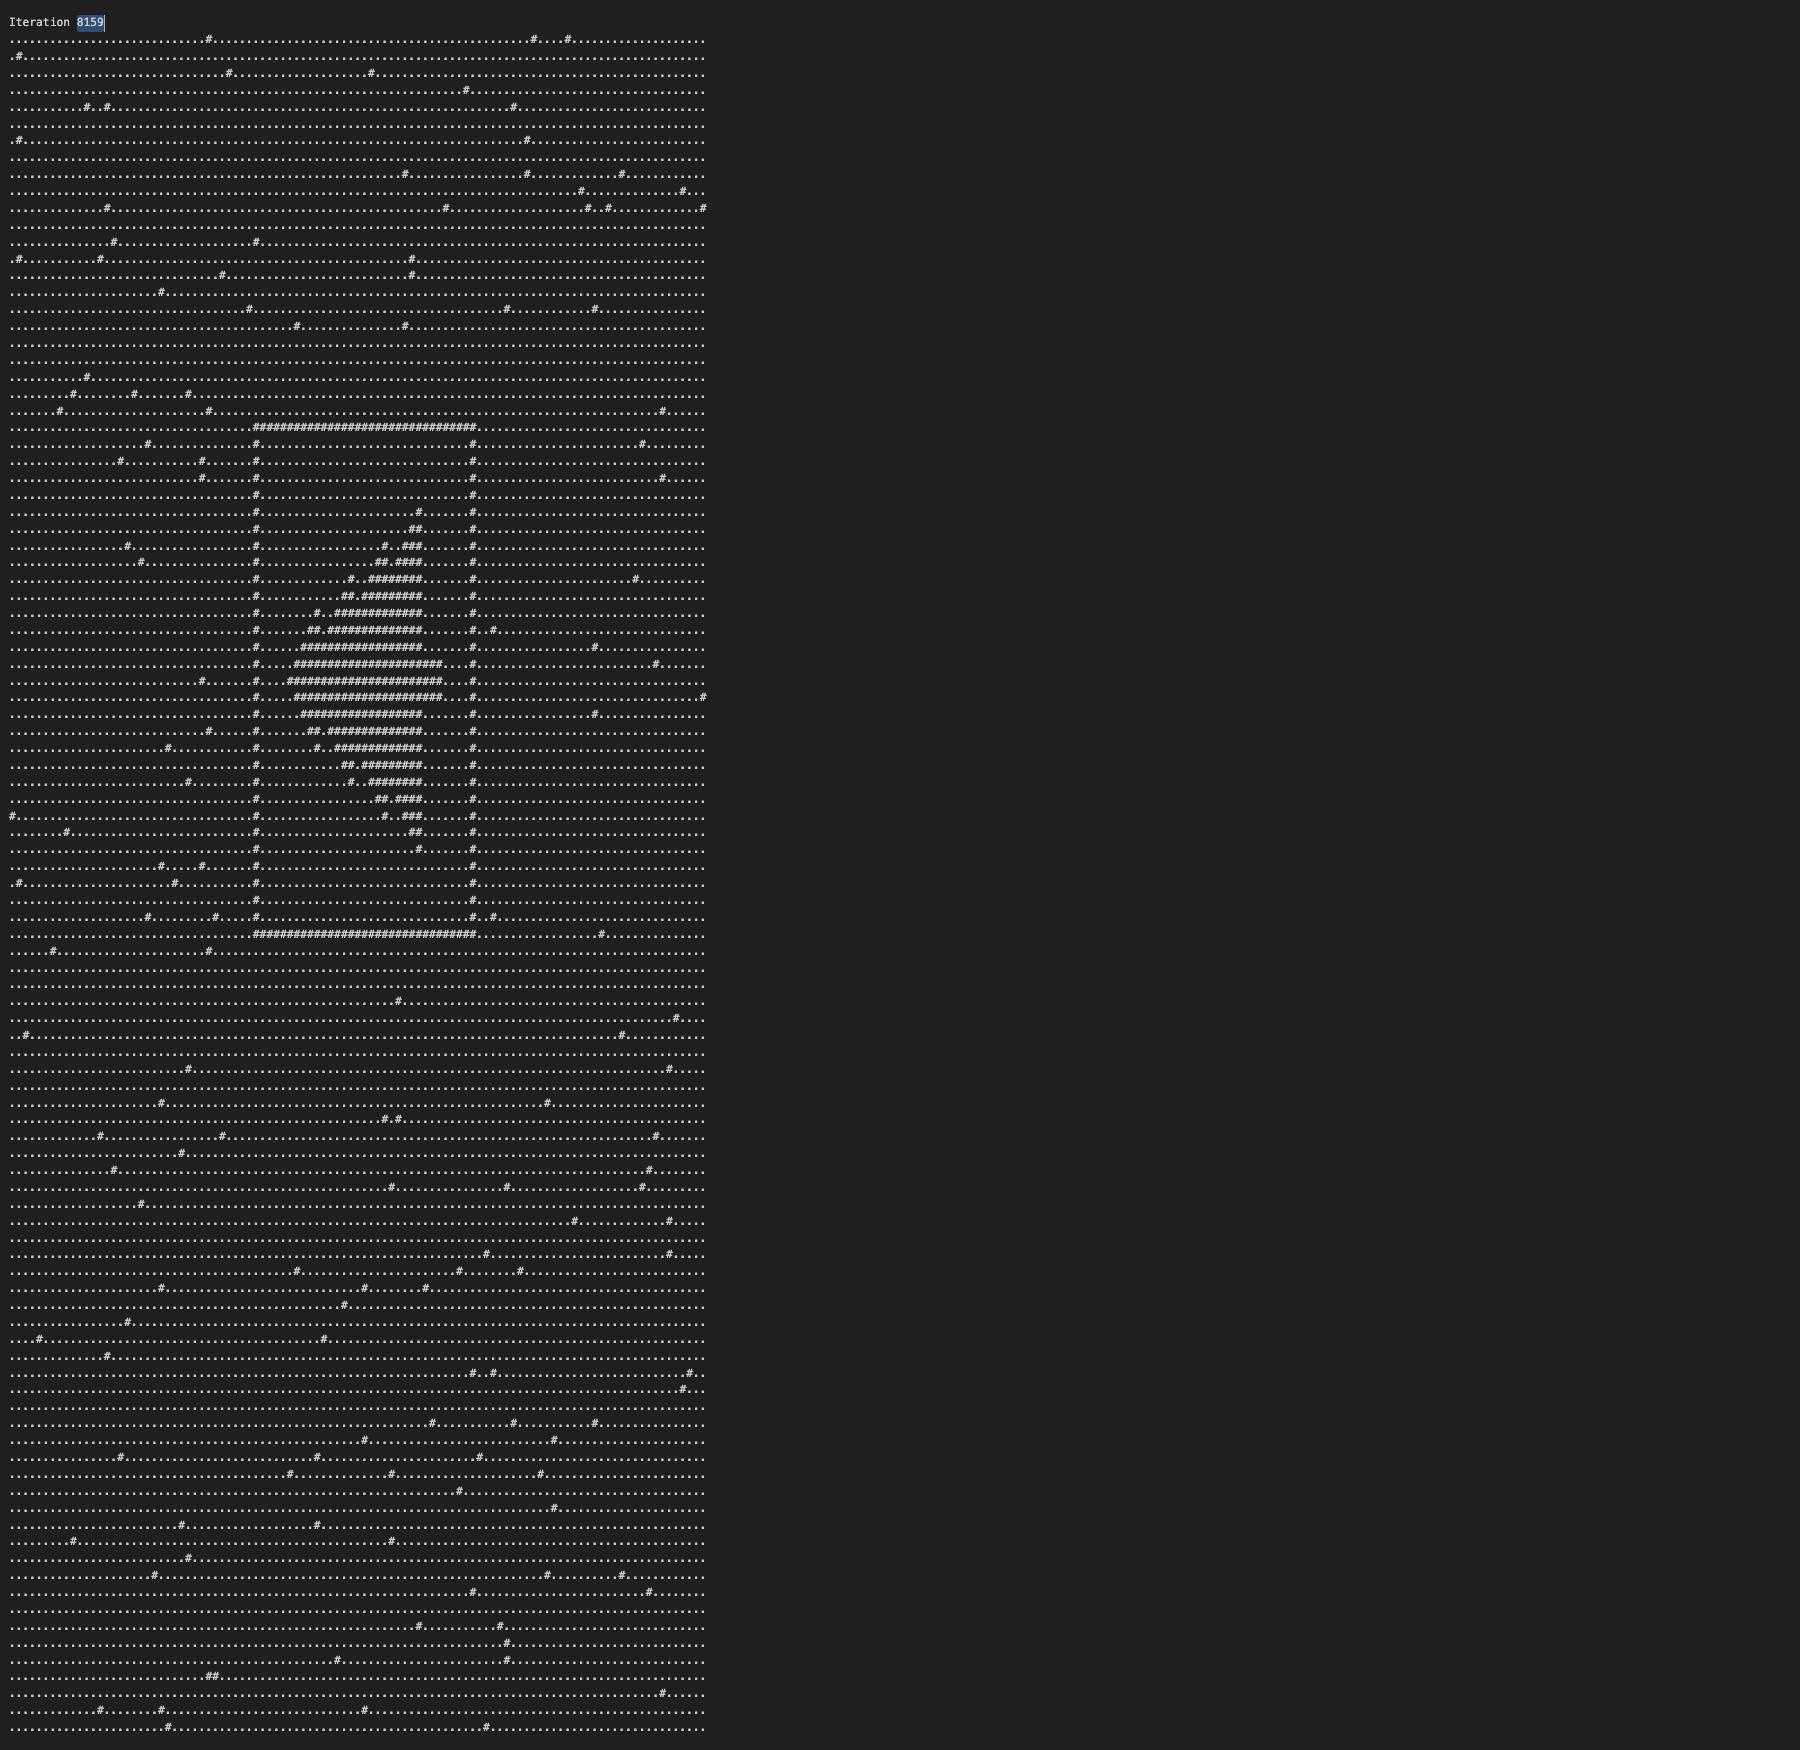